# Importing packages

In [2]:
from scipy.io import mmread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gene

Load sparse matrices, convert them to NumPy arrays and save as`.npy` files for fast loading later

In [61]:
with open("/nethome/kcni/nxu/scQuint/results/Gene_from_existing_BAMs/matrix.mtx", "r") as f:
    matrix = mmread(f)
    STAR_count_matrix = matrix.toarray()
with open("/nethome/kcni/nxu/scQuint/results/Gene_from_existing_BAMs/STAR_count_matrix.npy", "wb") as f:
    np.save(f, STAR_count_matrix)
with open("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/Gene/raw/matrix.mtx", "r") as f:
    matrix = mmread(f)
    STARsolo_count_matrix = matrix.toarray()
with open("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/Gene/raw/STARsolo_count_matrix.npy", "wb") as f:
    np.save(f, STARsolo_count_matrix)

Load count matrices from `.npy` files

In [35]:
STAR_count_matrix = np.load("/nethome/kcni/nxu/scQuint/results/Gene_from_existing_BAMs/STAR_count_matrix.npy")
STARsolo_count_matrix = np.load("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/Gene/raw/STARsolo_count_matrix.npy")
STAR_cell_list = pd.read_csv("/nethome/kcni/nxu/scQuint/results/Gene_from_existing_BAMs/barcodes_ann.tsv", sep = "\t")["file_name"].values
STARsolo_cell_list = pd.read_csv("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/Gene/raw/barcodes.tsv", header = None)[0].values

Remove cells that are only present in count matrix generated by STAR from the exisiting BAMs

In [42]:
STAR_count_matrix = np.delete(STAR_count_matrix, np.flatnonzero(np.isin(STAR_cell_list, STARsolo_cell_list, invert = True)), 1)

## Plotting

Text(0.5, 1.0, 'The number of uniquely mapped reads in each cell sample')

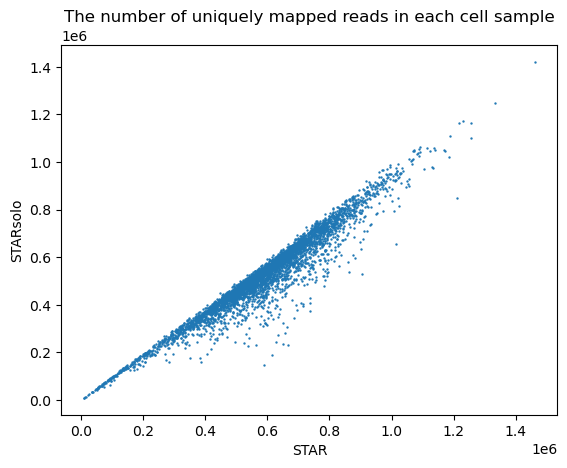

In [45]:
plt.scatter(np.sum(STAR_count_matrix, axis = 0), np.sum(STARsolo_count_matrix, axis = 0), s = 0.5)
plt.xlabel("STAR")
plt.ylabel("STARsolo")
plt.title("The number of uniquely mapped reads in each cell sample")

Text(0.5, 1.0, 'The number of genes detected in each cell sample')

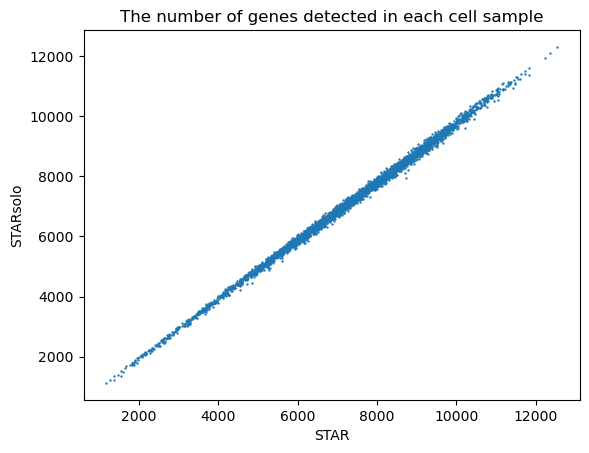

In [47]:
plt.scatter(
    np.apply_along_axis(lambda x: len(np.flatnonzero(x)), 0, STAR_count_matrix),
    np.apply_along_axis(lambda x: len(np.flatnonzero(x)), 0, STARsolo_count_matrix),
    s = 0.5
)
plt.xlabel("STAR")
plt.ylabel("STARsolo")
plt.title("The number of genes detected in each cell sample")

/tmp/ipykernel_11497/1104023088.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(np.sum(STAR_count_matrix, axis = 1)), np.log(np.sum(STARsolo_count_matrix, axis = 1)), s = 0.5)


Text(0.5, 1.0, 'The number of reads uniquely mapped to each gene')

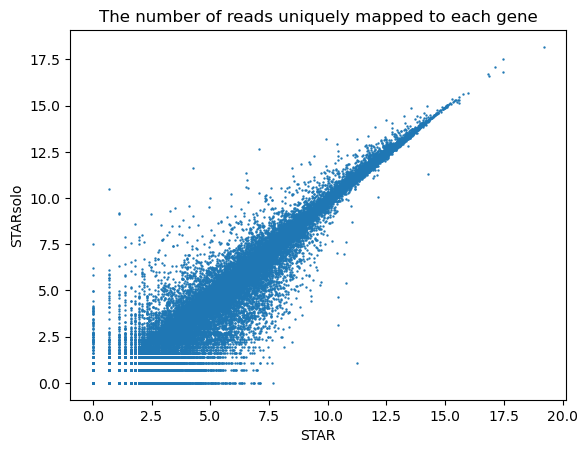

In [49]:
plt.scatter(np.log(np.sum(STAR_count_matrix, axis = 1)), np.log(np.sum(STARsolo_count_matrix, axis = 1)), s = 0.5)
plt.xlabel("STAR")
plt.ylabel("STARsolo")
plt.title("The number of reads uniquely mapped to each gene")

# Splice Junctions

In [50]:
with open("/nethome/kcni/nxu/scQuint/results/SJ_from_existing_BAMs/matrix.mtx", "r") as f:
    matrix = mmread(f)
    STAR_SJ_matrix = matrix.toarray()
with open("/nethome/kcni/nxu/scQuint/results/SJ_from_existing_BAMs/STAR_SJ_matrix.npy", "wb") as f:
    np.save(f, STAR_SJ_matrix)
with open("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/matrix.mtx", "r") as f:
    matrix = mmread(f)
    STARsolo_SJ_matrix = matrix.toarray()
with open("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/STARsolo_SJ_matrix.npy", "wb") as f:
    np.save(f, STARsolo_SJ_matrix)

In [ ]:
STAR_SJ_matrix = np.load("/nethome/kcni/nxu/scQuint/results/SJ_from_existing_BAMs/STAR_SJ_matrix.npy")
STARsolo_SJ_matrix = np.load("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/STARsolo_SJ_matrix.npy")
STAR_cell_list = pd.read_csv("/nethome/kcni/nxu/scQuint/results/SJ_from_existing_BAMs/barcodes_ann.tsv", sep = "\t")["file_name"].values
STARsolo_cell_list = pd.read_csv("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/barcodes.tsv", header = None)[0].values

Remove splice junctions that are only present in splice jucntions generated by STARsolo from raw fastq files, not in splice junctions generated from existing BAMs from STAR

In [78]:
STAR_SJ_list = pd.read_csv("/nethome/kcni/nxu/scQuint/results/SJ_from_existing_BAMs/features.tsv", sep = "\t", index_col = False, usecols = [1, 2], names = ["start", "end"])
STARsolo_SJ_list = pd.read_csv("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/features.tsv", sep = "\t", index_col = False, usecols = [1, 2], names = ["start", "end"])

In [98]:
common_introns = STAR_SJ_list.merge(STARsolo_SJ_list, how = "inner", on = ["start", "end"])

In [108]:
common_introns = pd.merge(common_introns, STAR_SJ_list.assign(STAR_SJ_index = STAR_SJ_list.index), on = ["start", "end"])

In [109]:
common_introns = pd.merge(common_introns, STARsolo_SJ_list.assign(STARsolo_SJ_index = STARsolo_SJ_list.index), on = ["start", "end"])

In [110]:
common_introns

,start,end,STAR_SJ_index,STARsolo_SJ_index
0,4854329,4855795,0,551
1,4878206,4878677,1,563
2,4878710,4898806,2,567
3,4898873,4900490,3,577
4,4900539,4902533,4,580
...,...,...,...,...
1176998,7147896,7192610,1221955,552919
1176999,96611509,96612164,1221956,714470
1177000,150992881,150994883,1221957,810260
1177001,91809234,91810250,1221958,1005807


In [111]:
len(STARsolo_SJ_list)

1234080

In [112]:
len(STAR_SJ_list)

1221960

In [130]:
STAR_SJ_matrix = STAR_SJ_matrix[common_introns['STAR_SJ_index'].values]

MemoryError: Unable to allocate 38.9 GiB for an array with shape (1177003, 4434) and data type int64

In [141]:
np.delete(STAR_SJ_matrix, np.flatnonzero(np.isin(range(len(STAR_SJ_list)), common_introns['STAR_SJ_index'].values, invert = True)), 0)

MemoryError: Unable to allocate 38.9 GiB for an array with shape (1176989, 4434) and data type int64